In [2]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt

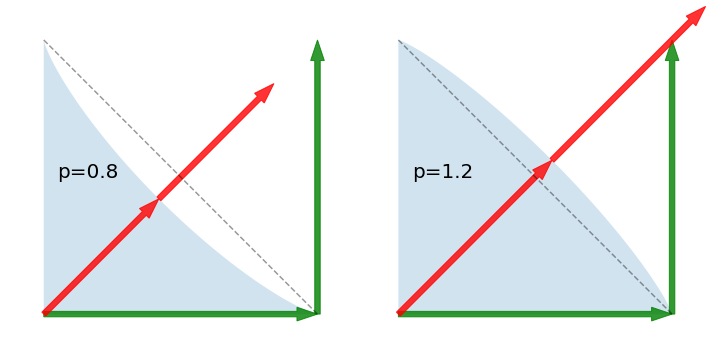

In [75]:
p1, p2 = 0.8, 1.2

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

for ax, p in zip([ax1, ax2], [p1, p2]):
    
    xs = np.arange(0, 1, 0.001)
    ys = (1-xs**p)**(1/p)
    
    ax.fill_between(xs, 0, ys, alpha=0.2)
    
    ax.arrow(0, 0, 1, 0, length_includes_head=True, head_width=0.05, width =0.02, alpha=0.8, color='g')
    ax.arrow(1, 0, 0, 1, length_includes_head=True, head_width=0.05, width =0.02, alpha=0.8, color='g')
    
    len_diag = 2**(-1/p)
    
    ax.arrow(0, 0, len_diag, len_diag, length_includes_head=True, head_width=0.05, width =0.02, alpha=0.8, color='r')
    ax.arrow(len_diag, len_diag, len_diag, len_diag, length_includes_head=True, head_width=0.05, width =0.02, alpha=0.8, color='r')
    
    ax.plot([0, 1], [1, 0], 'k--', alpha=0.4)
    ax.axis('off')
    ax.set(xlim=(-.05, 2*2**(-1/p2)), ylim=(-.05, 2*2**(-1/p2)))
    ax.annotate(f'p={p}', (0.05, .5), size=20)        
plt.tight_layout()

plt.savefig('img/stepwise.pdf')

In [73]:
np.random.randint()

TypeError: randint() takes at least 1 positional argument (0 given)